In [10]:
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Step 1: Load the model

In [11]:
model = load_model(r"path to the unet model")

In [12]:
# Step 2: Load the datasets
X_train = np.load(r'path\X_train.npy')
y_train = np.load(r'path\y_train.npy')
X_val = np.load(r'path\X_val.npy')
y_val = np.load(r'path\y_val.npy')
X_test = np.load(r'path\X_test.npy')
y_test = np.load(r'path\y_test.npy')

# Step 3: Evaluate the model on the validation and test sets

In [13]:
val_loss, val_acc = model.evaluate(X_val, y_val, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

In [14]:
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_acc)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)

Validation Loss: 0.46583184599876404
Validation Accuracy: 0.7885958552360535
Test Loss: 0.3346308767795563
Test Accuracy: 0.8781229853630066


# Step 4: Make predictions on the test set

In [15]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step


# Choose a random sample from the test set

In [16]:
idx = np.random.randint(0, len(X_test))
test_image = X_test[idx]
test_mask = y_test[idx]

# Predict the mask for the test image

In [17]:
predicted_mask = model.predict(np.expand_dims(test_image, axis=0))[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


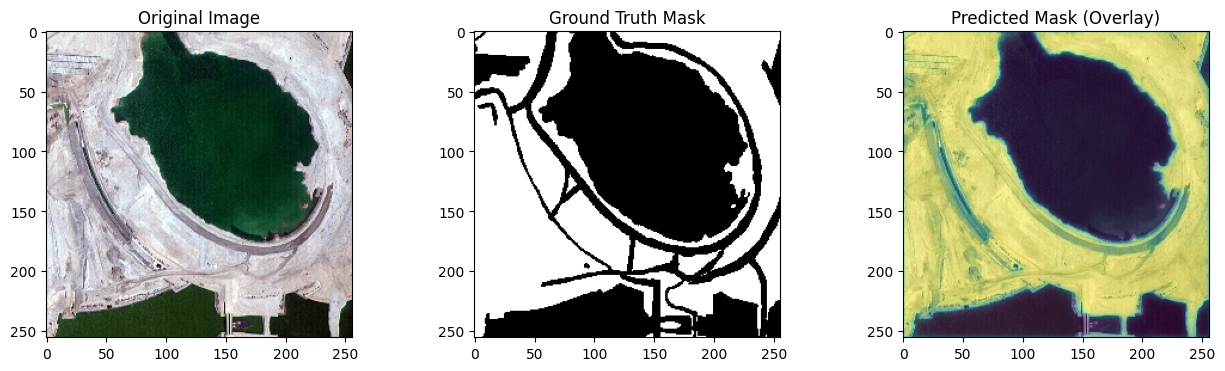

In [22]:
# Create a figure and adjust subplot spacing
plt.figure(figsize=(15, 5))
plt.subplots_adjust(wspace=0.4)

# Plot the original image
plt.subplot(1, 3, 1)
plt.imshow(test_image)
plt.title("Original Image")

# Plot the ground truth mask
plt.subplot(1, 3, 2)
plt.imshow(test_mask, cmap='gray')
plt.title("Ground Truth Mask")

# Plot the predicted mask overlaid on the original image
plt.subplot(1, 3, 3)
plt.imshow(test_image)
plt.imshow(predicted_mask, alpha=0.5, cmap='viridis')  # Adjust alpha for transparency
plt.title("Predicted Mask (Overlay)")

plt.show()